# Behavioral tagging

I'm going to use DeepOF package to process the output of DLC and to identify and classify the behavior.


In [1]:
import os
import pandas as pd
import pickle
import deepof.data

We'll also need some plotting gear:

In [ ]:
import deepof.visuals
import matplotlib.pyplot as plt
import seaborn as sns

### Creating and running a project

With that out of the way, the first thing to do when starting a DeepOF project is to load your videos and DeepLabCut tracking files into a deepof.data.Project object.

Like depicted in the cell below, the three crucial parameters to input are the project, video and tab paths.

* project_path specifies where the project folder containing all processing and output files will be created.
* video_path points towards where your DLC or SLEAP labelled videos are stored.
* similarly, table_path should point to the directory containing all tracking files (see section on supported input files below).
* last but not least, you can give your project a name (optional; _deepof_project_ by default).

In [5]:
my_deepof_project_raw = deepof.data.Project(
                project_path=os.path.join("./ProjectDeepOF/"),
                video_path=os.path.join("./Videos/"),
                table_path=os.path.join("./Tables/"),
                project_name="deepof_first_project",
                arena="polygonal-manual",
                animal_ids=["B", "W"],
                table_format="h5",
                video_format=".mp4",
                exclude_bodyparts=["Tail_1", "Tail_2", "Tail_tip"],
                video_scale=380,
                smooth_alpha=1,
                exp_conditions=None,
)

Let's then create our first project, by running the `.create()` method in our newly created object:

In [ ]:
my_deepof_project = my_deepof_project_raw.create(force=True)

### Edit arenas 

In [ ]:
my_deepof_project.edit_arenas(
    arena_type="polygonal-manual",
)

### Information

In [ ]:
print(my_deepof_project)
print(type(my_deepof_project))

With the `.get_coords()` method, for example, we can obtain the processed (smooth and imputed) tracks for all videos in a dictionary. The returned objects are called table dictionaries (TableDict is the name of the class). They follow a dictionary-like structure, where each value is a data frame. They also provide a plethora of extra methods, some of which we'll cover in these tutorials. Let's retrieve these for one of the animals:

In [ ]:
my_deepof_project.get_coords(polar=False, center="Center", align="Spine_1")['Test 1']

Furthermore, not only processed coordinates can be retrieved, but also distances, angles, and areas with the .get_distances(), .get_angles(), and .get_areas(), respectively.

In [ ]:
my_deepof_project.get_distances()['Test 1']

In [ ]:
my_deepof_project.get_angles()['Test 1']

In [ ]:
my_deepof_project.get_areas()['Test 1']

# Supervised annotation in DeepOF - search for pre-established patterns

##### Pipeline:
    
* Run the supervised annotation pipeline.
* Generate Gantt plots with all traits.
* Explore trait enrichment across conditions.
* Visualize global embeddings using the retrieved traits.

**We already have a project**

In [6]:
# Load a previously saved project
my_deepof_project = deepof.data.load_project("./ProjectDeepOF/deepof_first_project")

**Edit Arena if needed**

In [7]:
my_deepof_project.edit_arenas(
    arena_type="polygonal-manual",
)

Editing 2 arenas
Done!


In [8]:
print(my_deepof_project)

deepof analysis of 2 videos


### Running the supervised annotation pipeline

In [9]:
with open('./deepof_supervised_huddle_estimator.pkl', 'rb') as est:
    huddle_estimator = pickle.load(est)

In [10]:
supervised_annotation = my_deepof_project.supervised_annotation()

  0%|          | 0/2 [00:00<?, ?it/s]

path:  <_io.BufferedReader name='c:\\Users\\jalvarez\\AppData\\Local\\anaconda3\\envs\\deepof\\lib\\site-packages\\deepof\\trained_models\\deepof_supervised\\deepof_supervised_huddle_estimator.pkl'>


All-NaN slice encountered
All-NaN slice encountered
 50%|█████     | 1/2 [00:06<00:06,  6.17s/it]

path:  <_io.BufferedReader name='c:\\Users\\jalvarez\\AppData\\Local\\anaconda3\\envs\\deepof\\lib\\site-packages\\deepof\\trained_models\\deepof_supervised\\deepof_supervised_huddle_estimator.pkl'>


All-NaN slice encountered
All-NaN slice encountered
100%|██████████| 2/2 [00:12<00:00,  6.12s/it]


In [11]:
supervised_annotation['Test 1']

,individual1_individual2_nose2nose,individual1_individual2_sidebyside,individual1_individual2_sidereside,individual1_individual2_nose2tail,individual2_individual1_nose2tail,individual1_individual2_nose2body,individual2_individual1_nose2body,individual1_individual2_following,individual2_individual1_following,individual1_climbing,...,individual1_huddle,individual1_lookaround,individual1_speed,individual2_climbing,individual2_sniffing,individual2_huddle,individual2_lookaround,individual2_speed,individual1_missing,individual2_missing
00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,1.0,0.0,0.000,0,0
00:00:00.066489361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,1.0,0.0,0.000,0,0
00:00:00.132978723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,1.0,0.0,0.000,0,0
00:00:00.199468085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0,0
00:00:00.265957446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.171,0.0,0.0,0.0,0.0,0.922,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:02:54.667553191,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,1.0,...,0.0,0.0,1.029,NaN,NaN,NaN,NaN,NaN,0,1
00:02:54.734042553,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,2.953,0.0,0.0,1.0,0.0,0.000,0,0
00:02:54.800531914,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,3.082,0.0,0.0,1.0,0.0,0.000,0,0
00:02:54.867021276,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.520,0.0,0.0,1.0,0.0,0.000,0,0


### Generating Gantt charts with all traits

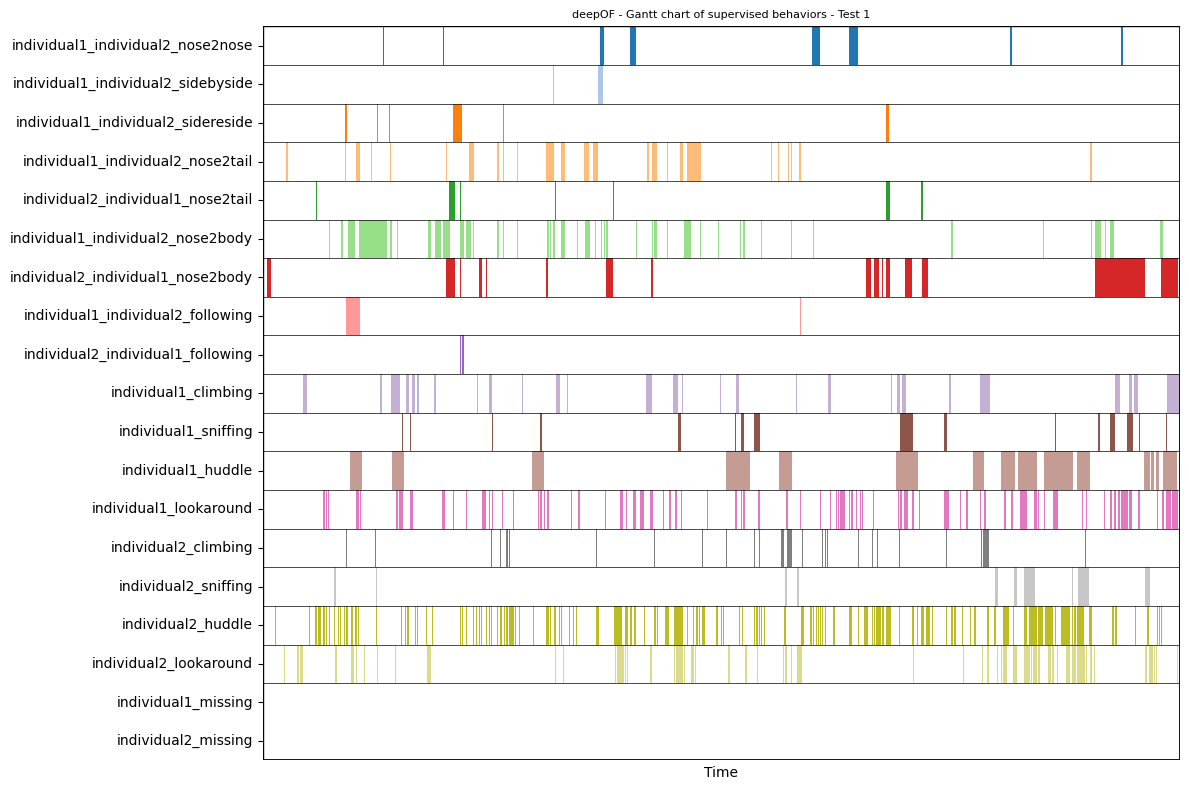

In [12]:
plt.figure(figsize=(12, 8))

deepof.visuals.plot_gantt(
    my_deepof_project,
    'Test 1',
    supervised_annotations=supervised_annotation,
)

plt.show()

In [13]:
# Now, with the time instants of nose2nose event, I'm going to create a video with only the frames of the nose2nose event.

# First, I'm going to get the time instants of the nose2nose event
nose2nose_instants = supervised_annotation['Test 1']['individual1_individual2_nose2nose']

In [14]:
print(type(nose2nose_instants))

# Get where the instant != 0
nose2nose_inst = nose2nose_instants[nose2nose_instants != 0]
index = nose2nose_instants != 0



<class 'pandas.core.series.Series'>


In [28]:
# Make a video for each event

import cv2
import numpy as np

path = './Videos/Test 1DLC_dlcrnetms5_mice_14bodypointsMay15shuffle1_22000_el_id_labeled.mp4'
# Check if path exists
if not os.path.exists(path):
    print('Video not found')
    
cap = cv2.VideoCapture(path)
fps = cap.get(cv2.CAP_PROP_FPS)

# For each event Test 1 
for event in supervised_annotation['Test 1']:
    event_instants = supervised_annotation['Test 1'][event]
    index_event = event_instants != 0
    # Get the frames of the event
    frames = []
    for i in range(len(index_event)):
        if index_event[i]:
            cap.set(cv2.CAP_PROP_POS_FRAMES, i)
            ret, frame = cap.read()
            frames.append(frame)

    # Folder to store the event videos
    if not os.path.exists('./Videos_per_event/Test 1'):
        os.makedirs('./Videos_per_event/Test 1')
    # Save the frames to a video
    out = cv2.VideoWriter(f'./Videos_per_event/Test 1/{event}.avi', cv2.VideoWriter_fourcc(*'DIVX'), fps, (frame.shape[1], frame.shape[0]))
    for frame in frames:
        out.write(frame)
    out.release()
    


In [29]:
# Make a video for each event

import cv2
import numpy as np

path = './Videos/Test 5DLC_dlcrnetms5_mice_14bodypointsMay15shuffle1_22000_el_id_labeled.mp4'
# Check if path exists
if not os.path.exists(path):
    print('Video not found')
    
cap = cv2.VideoCapture(path)
fps = cap.get(cv2.CAP_PROP_FPS)

# For each event Test 1 
for event in supervised_annotation['Test 5']:
    event_instants = supervised_annotation['Test 5'][event]
    index_event = event_instants != 0
    # Get the frames of the event
    frames = []
    for i in range(len(index_event)):
        if index_event[i]:
            cap.set(cv2.CAP_PROP_POS_FRAMES, i)
            ret, frame = cap.read()
            frames.append(frame)

    # Folder to store the event videos
    if not os.path.exists('./Videos_per_event/Test 5'):
        os.makedirs('./Videos_per_event/Test 5')
    # Save the frames to a video
    out = cv2.VideoWriter(f'./Videos_per_event/Test 5/{event}.avi', cv2.VideoWriter_fourcc(*'DIVX'), fps, (frame.shape[1], frame.shape[0]))
    for frame in frames:
        out.write(frame)
    out.release()
    

# Unsupervised annotation in DeepOF - exploring the behavioral space


In [30]:
import copy
import os
import numpy as np
import pickle
import deepof.data

In [31]:
from IPython import display
from networkx import Graph, draw
import deepof.visuals
import matplotlib.pyplot as plt
import seaborn as sns

### Processing time series for unsupervised learning

**Generate datasets with and without graphs**

Let's start simple: we can omit the graph representations and generate DeepOF-ready datasets by running the `.preprocess()` method on any TabDict object (TabDict are the dictionary-like structures that we saw in the first tutorial).

In [39]:
# This code will generate a dataset without graph representations
coords = my_deepof_project.get_coords( center="Center", align="Spine_1")
preprocessed_coords, global_scaler = coords.preprocess(
    window_size=25, # Sliding window length
    window_step=1, # Sliding window stride
    test_videos=1, # Number of videos in the validation set
    scale="standard", # Scaling method
)

<font color = "red">
The first thing to notice here is that we're only passing the coordinates as input (no speed, no distances). While a merged object can be passed in theory to get embeddings that carry other signals (see tutorial on preprocessing), that often leads in practice to unstable training (at least in our experiments). So let's continue with coordinates only!

- preprocessed_coords is a tuple containing four numpy arrays. These correspond to training and validation features (X) and label (y) datasets, respectively

In [40]:
print("Features in the training set have shape {}".format(preprocessed_coords[0].shape))
print("Features in the validation set have shape {}".format(preprocessed_coords[2].shape))

Features in the training set have shape (2610, 25, 44)
Features in the validation set have shape (2608, 25, 44)


Data coming from each video are normalized independently in both training and validation sets, which helps correct for differences in body size. All videos in the training set are then scaled together, and the fitted global_scaler is then returned for further processing as we'll see below.

Let's generate a graph-based dataset and understand its output. To do this, we can preprocess our coordinates directly (no need to create the feature objects by ourselves) using the `.get_graph_dataset()` method. Under the hood, DeepOF will create a TableDict object containing centered and aligned coordinates, speeds, and distances corresponding to the edges of the aforementioned graph.

In [41]:
# This code will generate a dataset using graph representations, as well a some auxiliary objects
graph_preprocessed_coords, adj_matrix, to_preprocess, global_scaler = my_deepof_project.get_graph_dataset(
    #animal_id="B", # Comment out for multi-animal embeddings
    center="Center",
    align="Spine_1",
    window_size=25,
    window_step=1,
    test_videos=1,
    preprocess=True,
    scale="standard",
)

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


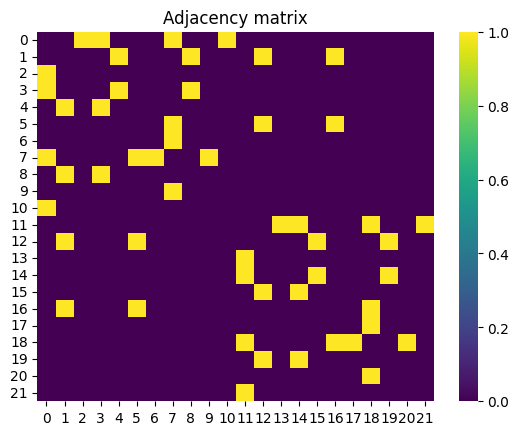

In [46]:
# Plot the adjacency matrix
plt.figure()
sns.heatmap(adj_matrix, cmap="viridis")
plt.title("Adjacency matrix")
plt.show()

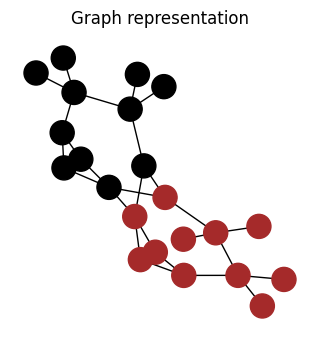

In [70]:
plt.figure(figsize=(3, 3))
# Plot the graph with the first 11 nodes in black and the rest in wine color
G = Graph(adj_matrix)
draw(G, node_color=["black"] * 11 + ["brown"] * (len(adj_matrix) - 11))
plt.title("Graph representation")
plt.show()

In [47]:
print("Node features in the training set have shape {}".format(graph_preprocessed_coords[0].shape))
print("Edge features in the training set have shape {}".format(graph_preprocessed_coords[1].shape))
print("Node features in the validation set have shape {}".format(graph_preprocessed_coords[3].shape))
print("Edge features in the validation set have shape {}".format(graph_preprocessed_coords[4].shape))

Node features in the training set have shape (2610, 25, 66)
Edge features in the training set have shape (2610, 25, 26)
Node features in the validation set have shape (2608, 25, 66)
Edge features in the validation set have shape (2608, 25, 26)


### Embedding our data with deep clustering models

<font color = 'red'>

**This will take too long without GPU**

In [72]:
trained_model = my_deepof_project.deep_unsupervised_embedding(
    preprocessed_object=graph_preprocessed_coords, # Change to preprocessed_coords to use non-graph embeddings
    adjacency_matrix=adj_matrix,
    embedding_model="VaDE", # Can also be set to 'VQVAE' and 'Contrastive'
    epochs=10,
    encoder_type="recurrent", # Can also be set to 'TCN' and 'transformer'
    n_components=10,
    latent_dim=4,
    batch_size=1024,
    verbose=False, # Set to True to follow the training loop
    interaction_regularization=0.5,
    pretrained=False, # Set to False to train a new model!
)

KeyboardInterrupt: 